In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1:

(10 points)

**a)** The file `data_problem1.csv` contains a sequence of observations. In this problem you should do the following:

1. Load the data and split it into 80 % training and 20 % validation data.
2. Pre-process the data as you find appropriate.
3. Produce mean-squared-error curves for model orders in the range $p=1,\dots,10$. Plot both training and validation errors as two separate curves.
4. Based on the error curves, pick a final model order $p$ that you think is appropriate. **Motivate your choice!**


<div style="text-align: right"> (6p) </div>


In [2]:
data = pd.read_csv('data_problem1.csv', header = 0)
y = data['Data'].values

**Solution:**

In [3]:
# Load the data and split it into 80 % training and 20 % validation data
ndata=len(y)
y=y.reshape(-1,1)
x=(np.array(range(ndata))+1).reshape(-1, 1)
train_x=x[:int(ndata*0.8)]
test_x=x[int(ndata*0.8):]
#print(train_x)

In [4]:
from sklearn import linear_model as lm  # Used for solving linear regression problems

# Pre-process
linreg=lm.LinearRegression().fit(x,y)
predict_line=linreg.predict(x)

new_y=y-predict_line
train_data=new_y[:int(ndata*0.8)].reshape(-1, 1)
valid_data=new_y[int(ndata*0.8):].reshape(-1, 1)

#print(train_data)

In [5]:
from tssltools import fit_ar,predict_ar_1step

# Train and predict the model
p=10
reg_coef=fit_ar(train_data.flatten(), p)
pred_y=predict_ar_1step(reg_coef, new_y)

pred_train_y=pred_y[:(len(train_data)-p)]
pred_valid_y=pred_y[(len(train_data)-p):]

#print(pred_train_y.shape)
#print(pred_valid_y.shape)
#print(pred_train_y)

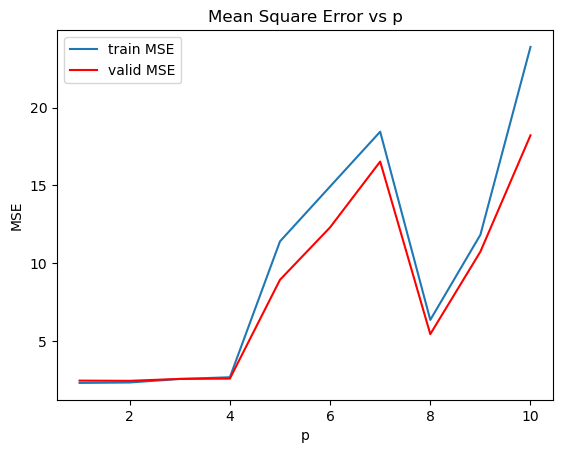

The best choice for p is 2


In [6]:
# Produce mean-squared-error curves for model orders in the range p=1,…,10. Plot both training and validation errors as two separate curves
train_MSE=np.zeros(10)
valid_MSE=np.zeros(10)
for i in range(10):
    p=i+1
    reg_coef=fit_ar(train_data.flatten(), p)
    pred_y=predict_ar_1step(reg_coef, new_y)

    pred_train_y=pred_y[:(len(train_data)-p)]
    pred_valid_y=pred_y[(len(train_data)-p):]
    
    train_MSE[i]=np.mean((pred_train_y-new_y[:(len(train_data)-p)])**2)
    valid_MSE[i]=np.mean((pred_valid_y-new_y[(len(train_data)-p):])**2)
    
    
plt.plot(np.array(range(10))+1,train_MSE,label="train MSE")
plt.plot(np.array(range(10))+1,valid_MSE,label="valid MSE",c='r')
plt.title('Mean Square Error vs p')
plt.xlabel('p')
plt.ylabel('MSE')
plt.legend()
plt.show()
    
print("The best choice for p is",np.argmin(valid_MSE)+1)

___

**b)** Verify that the resulting AR models is stable directly based on the model parameters.
<div style="text-align: right"> (2p) </div>

**Solution:**

Base on the model parameters (0.1055,-0.0112), the absolute of $\alpha$ is smaller than 1, which means that the model will converge to stationary finally.

In [7]:
p=2
reg_coef_star=fit_ar(train_data.flatten(), p)
print(reg_coef_star)

[ 0.10547724 -0.01117918]


___

**c)** Predict the value of $y_{n+1}$. Where $n$ is the **total number of observations** including both the training and testing data.
<div style="text-align: right"> (2p) </div>

**Solution:**

In [10]:
ar_pred=np.dot(reg_coef_star,np.array([new_y[len(new_y)-1],new_y[len(new_y)-2]]))
regular=linreg.predict(x+1)
print(ar_pred+regular[len(x)-1])
#pred=pred_y_np1+regular
#print(pred)

[-25.11168633]
